# Sales Prediction by Using Dataset 1 (w21052079)

In [1]:
# Importing Required libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from a CSV file named "sales.csv" into a pandas DataFrame
df = pd.read_csv("Dataset_1.csv")

In [3]:
# Using df.head() to display the first 5 rows of the DataFrame

df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

      Review  
0  Excellent  
1  Excellent  
2       Good  
3       Good  
4    Average

# Converting Reviews to Sentimental Analysis

In [4]:
from textblob import TextBlob

# Assuming your DataFrame is named df, and the "Review" column contains the reviews
reviews = df['Review']

# Create a new column 'Sentiment' to store the sentiment polarity
df['Sentiment'] = reviews.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the updated DataFrame with the sentiment column
print(df[['Review', 'Sentiment']])


        Review  Sentiment
0    Excellent       1.00
1    Excellent       1.00
2         Good       0.70
3         Good       0.70
4      Average      -0.15
..         ...        ...
995    Average      -0.15
996       Poor      -0.40
997       Good       0.70
998       Poor      -0.40
999    Average      -0.15

[1000 rows x 2 columns]


In [5]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating     Review  Sentiment  
0         26.1415     9.1  Excellent       1.00  
1          3.8200     9.6  Excellent       1.00  
2         16.2155     7.4       Good       0.70  
3         23.2880     8.4       Good       0.70  
4         30.2085     5.3    Average      -0.15  
..            ...     ...        ...        ...  
995        2.0175     6.2    Average      -0.15  
996       48.6900     4.4       Poor      -0.40  
997        1.5920     7.7       Good       0.70  
998        3.2910     4.1       Poor      -0.40  
999       30.9190     6.6    Average      -0.15  

[1000 rows x 19 columns]

In [6]:
# Printing information about the dataset
print("Dataset Information:")

# Using df.info() to display basic information about the DataFrame
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gros

In [7]:
# Generating summary statistics for numerical columns in the DataFrame using describe()
df.describe().columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Sentiment'],
      dtype='object')

In [8]:
# Displaying missing values count for each column
print("\nMissing Values:")
print(df.isnull().sum())

# Creating a heatmap using Plotly
fig = px.imshow(df.isnull(), 
                labels=dict(color="Missing Values"),
                color_continuous_scale='viridis',
                title='Missing Values Heatmap')

# Updating layout for better display
fig.update_layout(width=800, height=500, coloraxis_showscale=False)

# Showing the interactive plot
fig.show()



Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Review                     0
Sentiment                  0
dtype: int64


In [9]:
# Displaying unique values count for each categorical column
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values in Categorical Columns:
Invoice ID: 1000 unique values
Branch: 3 unique values
City: 3 unique values
Customer type: 2 unique values
Gender: 2 unique values
Product line: 6 unique values
Date: 89 unique values
Time: 506 unique values
Payment: 3 unique values
Review: 4 unique values


In [10]:
# Count the occurrences of each unique value in the 'City' column and display the result
city_counts = df['City'].value_counts()

In [11]:
# Visualising City-wise Sales Distribution
city_counts = df['City'].value_counts()
fig_city = px.bar(x=city_counts.index, y=city_counts.values, text=city_counts.values,
                  labels={'x': 'City', 'y': 'Count'},
                  title='City-wise Sales Distribution')
fig_city.update_traces(texttemplate='%{text}', textposition='outside')
fig_city.show()


In [13]:
# Count the occurrences of each unique value in the 'Customer type' column and display the result
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [14]:
# Visualising Customer Type Distribution
customer_type_counts = df['Customer type'].value_counts()
fig_customer_type = px.pie(customer_type_counts, names=customer_type_counts.index,
                           title='Customer Type Distribution')
fig_customer_type.show()


In [15]:
# Count the occurrences of each unique value in the 'Product line' column and display the result
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [16]:
# Visualising Product Line-wise Sales Distribution
product_line_counts = df['Product line'].value_counts()
fig_product_line = px.bar(x=product_line_counts.index, y=product_line_counts.values, text=product_line_counts.values,
                          labels={'x': 'Product Line', 'y': 'Count'},
                          title='Product Line-wise Sales Distribution')
fig_product_line.update_traces(texttemplate='%{text}', textposition='outside')
fig_product_line.show()


In [17]:
# Count the occurrences of each unique value in the 'Gender' column and display the result
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [18]:
# Visualising Gender Distribution
gender_counts = df['Gender'].value_counts()
fig_gender = px.pie(gender_counts, names=gender_counts.index, title='Gender Distribution')
fig_gender.show()

In [19]:
# Count the occurrences of each unique value in the 'Branch' column and display the result
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [20]:
# Visualising Branch-wise Sales Distribution
branch_counts = df['Branch'].value_counts()
fig_branch = px.bar(x=branch_counts.index, y=branch_counts.values, text=branch_counts.values,
                    labels={'x': 'Branch', 'y': 'Count'},
                    title='Branch-wise Sales Distribution')
fig_branch.update_traces(texttemplate='%{text}', textposition='outside')
fig_branch.show()


## Data Preprocessing and Handling Categorical Features

In [21]:
# Drop irrelevant columns
df = df.drop(["Invoice ID", "Date", "Time","Review"], axis=1)

# Impute numerical features with mean and categorical features with mode
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [22]:
# Converting categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Customer type'] = label_encoder.fit_transform(df['Customer type'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Branch'] = label_encoder.fit_transform(df['Branch'])
df['Product line'] = label_encoder.fit_transform(df['Product line'])
df['Payment'] = label_encoder.fit_transform(df['Payment'])

In [23]:
# Display the preprocessed data
print("Preprocessed Data Preview:")
df.head()

Preprocessed Data Preview:


Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0       0     2              0       0             3       74.69         7   
1       2     1              1       0             0       15.28         5   
2       0     2              1       1             4       46.33         7   
3       0     2              0       1             3       58.22         8   
4       0     2              1       1             5       86.31         7   

    Tax 5%     Total  Payment    cogs  gross margin percentage  gross income  \
0  26.1415  548.9715        2  522.83                 4.761905       26.1415   
1   3.8200   80.2200        0   76.40                 4.761905        3.8200   
2  16.2155  340.5255        1  324.31                 4.761905       16.2155   
3  23.2880  489.0480        2  465.76                 4.761905       23.2880   
4  30.2085  634.3785        2  604.17                 4.761905       30.2085   

   Rating  Sentiment  
0     9.1       1.00  
1     9.6       1.00  
2     7.4       0.70  
3     8.4       0.70  
4     5.3      -0.15

In [24]:
# Scatter plot between "Unit price" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Unit price", y="Total", title="Scatter Plot: Unit Price vs. Total Sales",
                          labels={"Unit price": "Unit Price", "Total": "Total Sales"})
scatter_plot.show()

In [25]:
# Scatter plot between "Quantity" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Quantity", y="Total", title="Scatter Plot: Quantity vs. Total Sales",
                          labels={"Quantity": "Quantity", "Total": "Total Sales"})
scatter_plot.show()

## Outliers

In [26]:
# Specify the numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64']).columns

# Function to detect and handle outliers using IQR
def handle_outliers(dataframe, columns):
    for column in columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and handle outliers by capping them at the bounds
        dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outliner detection and handling
handle_outliers(df, numerical_columns)

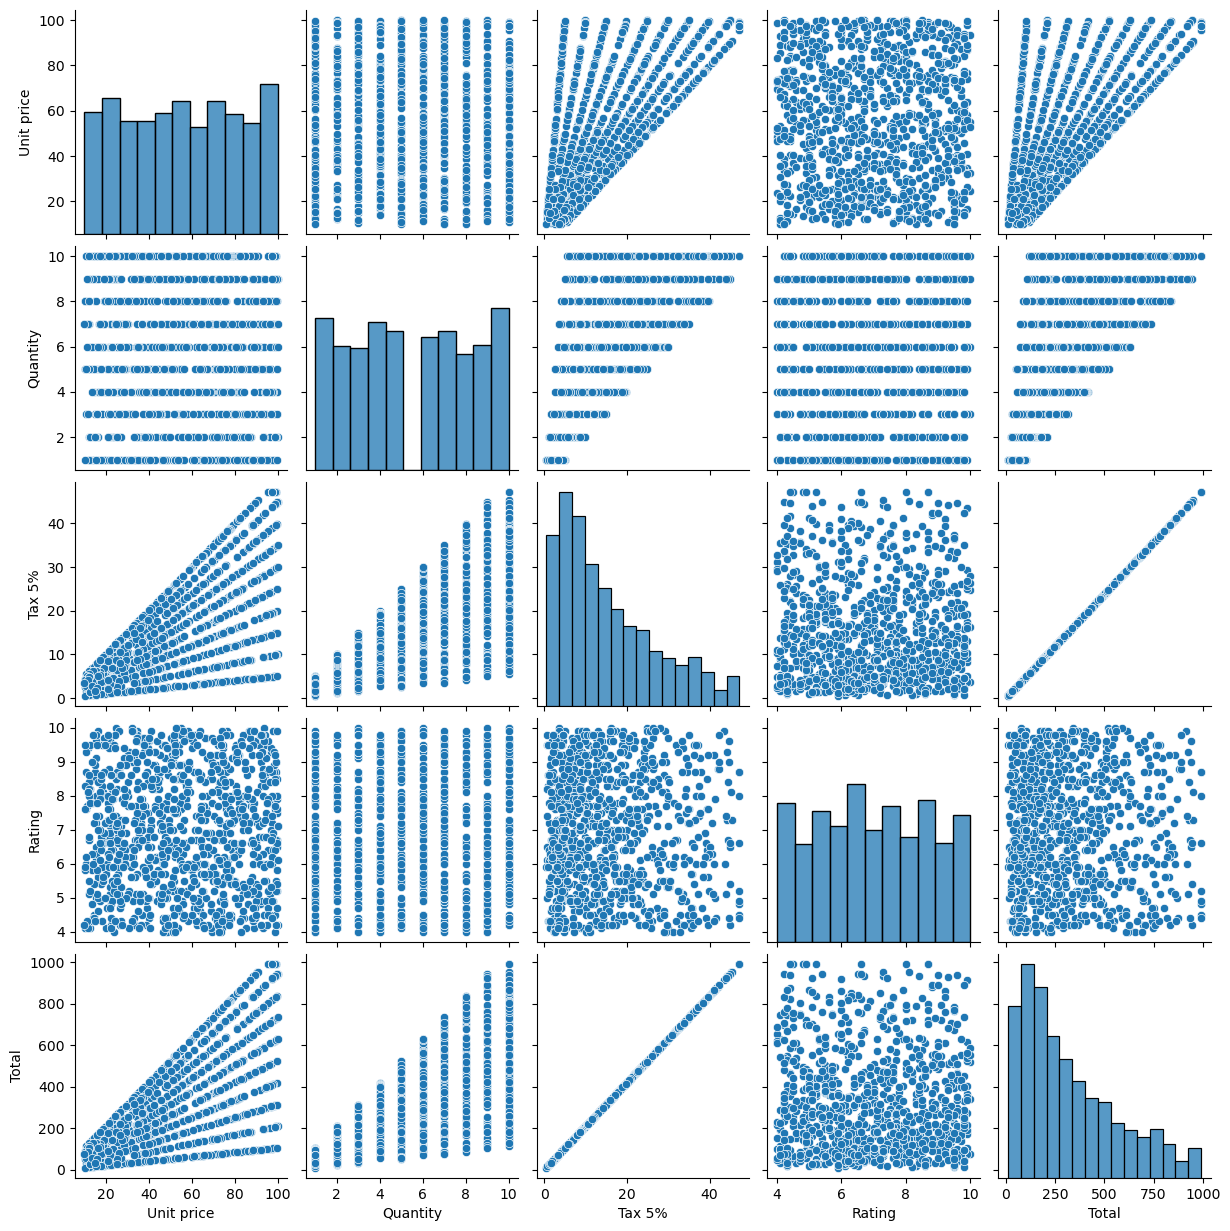

In [27]:
# Visualising the distribution of numerical variables using a pair plot
# The seaborn library's pairplot is used to create scatterplots for numerical variables
sns.pairplot(df[['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'Total']])
plt.show()

In [28]:
df.corr()

Branch      City  Customer type    Gender  \
Branch                   1.000000 -0.507401      -0.019608 -0.056318   
City                    -0.507401  1.000000       0.004899  0.012219   
Customer type           -0.019608  0.004899       1.000000  0.039996   
Gender                  -0.056318  0.012219       0.039996  1.000000   
Product line            -0.053938  0.008811      -0.036800  0.005193   
Unit price               0.028202 -0.013763      -0.020238  0.015445   
Quantity                 0.015964 -0.002121      -0.016763 -0.074258   
Tax 5%                   0.040518 -0.012773      -0.019903 -0.049195   
Total                    0.040518 -0.012773      -0.019903 -0.049195   
Payment                 -0.050104  0.019094       0.018073  0.044578   
cogs                     0.040518 -0.012773      -0.019903 -0.049195   
gross margin percentage       NaN       NaN            NaN       NaN   
gross income             0.040518 -0.012773      -0.019903 -0.049195   
Rating                   0.010238  0.049585       0.018889  0.004800   
Sentiment                0.000807  0.063307       0.011484 -0.014793   

                         Product line  Unit price  Quantity    Tax 5%  \
Branch                      -0.053938    0.028202  0.015964  0.040518   
City                         0.008811   -0.013763 -0.002121 -0.012773   
Customer type               -0.036800   -0.020238 -0.016763 -0.019903   
Gender                       0.005193    0.015445 -0.074258 -0.049195   
Product line                 1.000000    0.019321  0.020256  0.031760   
Unit price                   0.019321    1.000000  0.010778  0.634170   
Quantity                     0.020256    0.010778  1.000000  0.706024   
Tax 5%                       0.031760    0.634170  0.706024  1.000000   
Total                        0.031760    0.634170  0.706024  1.000000   
Payment                      0.029896   -0.015941 -0.003921 -0.012882   
cogs                         0.031760    0.634170  0.706024  1.000000   
gross margin percentage           NaN         NaN       NaN       NaN   
gross income                 0.031760    0.634170  0.706024  1.000000   
Rating                      -0.020529   -0.008778 -0.015815 -0.036213   
Sentiment                   -0.014339   -0.008579 -0.000016 -0.023561   

                            Total   Payment      cogs  \
Branch                   0.040518 -0.050104  0.040518   
City                    -0.012773  0.019094 -0.012773   
Customer type           -0.019903  0.018073 -0.019903   
Gender                  -0.049195  0.044578 -0.049195   
Product line             0.031760  0.029896  0.031760   
Unit price               0.634170 -0.015941  0.634170   
Quantity                 0.706024 -0.003921  0.706024   
Tax 5%                   1.000000 -0.012882  1.000000   
Total                    1.000000 -0.012882  1.000000   
Payment                 -0.012882  1.000000 -0.012882   
cogs                     1.000000 -0.012882  1.000000   
gross margin percentage       NaN       NaN       NaN   
gross income             1.000000 -0.012882  1.000000   
Rating                  -0.036213 -0.005381 -0.036213   
Sentiment               -0.023561 -0.006804 -0.023561   

                         gross margin percentage  gross income    Rating  \
Branch                                       NaN      0.040518  0.010238   
City                                         NaN     -0.012773  0.049585   
Customer type                                NaN     -0.019903  0.018889   
Gender                                       NaN     -0.049195  0.004800   
Product line                                 NaN      0.031760 -0.020529   
Unit price                                   NaN      0.634170 -0.008778   
Quantity                                     NaN      0.706024 -0.015815   
Tax 5%                                       NaN      1.000000 -0.036213   
Total                                        NaN      1.000000 -0.036213   
Payment                         

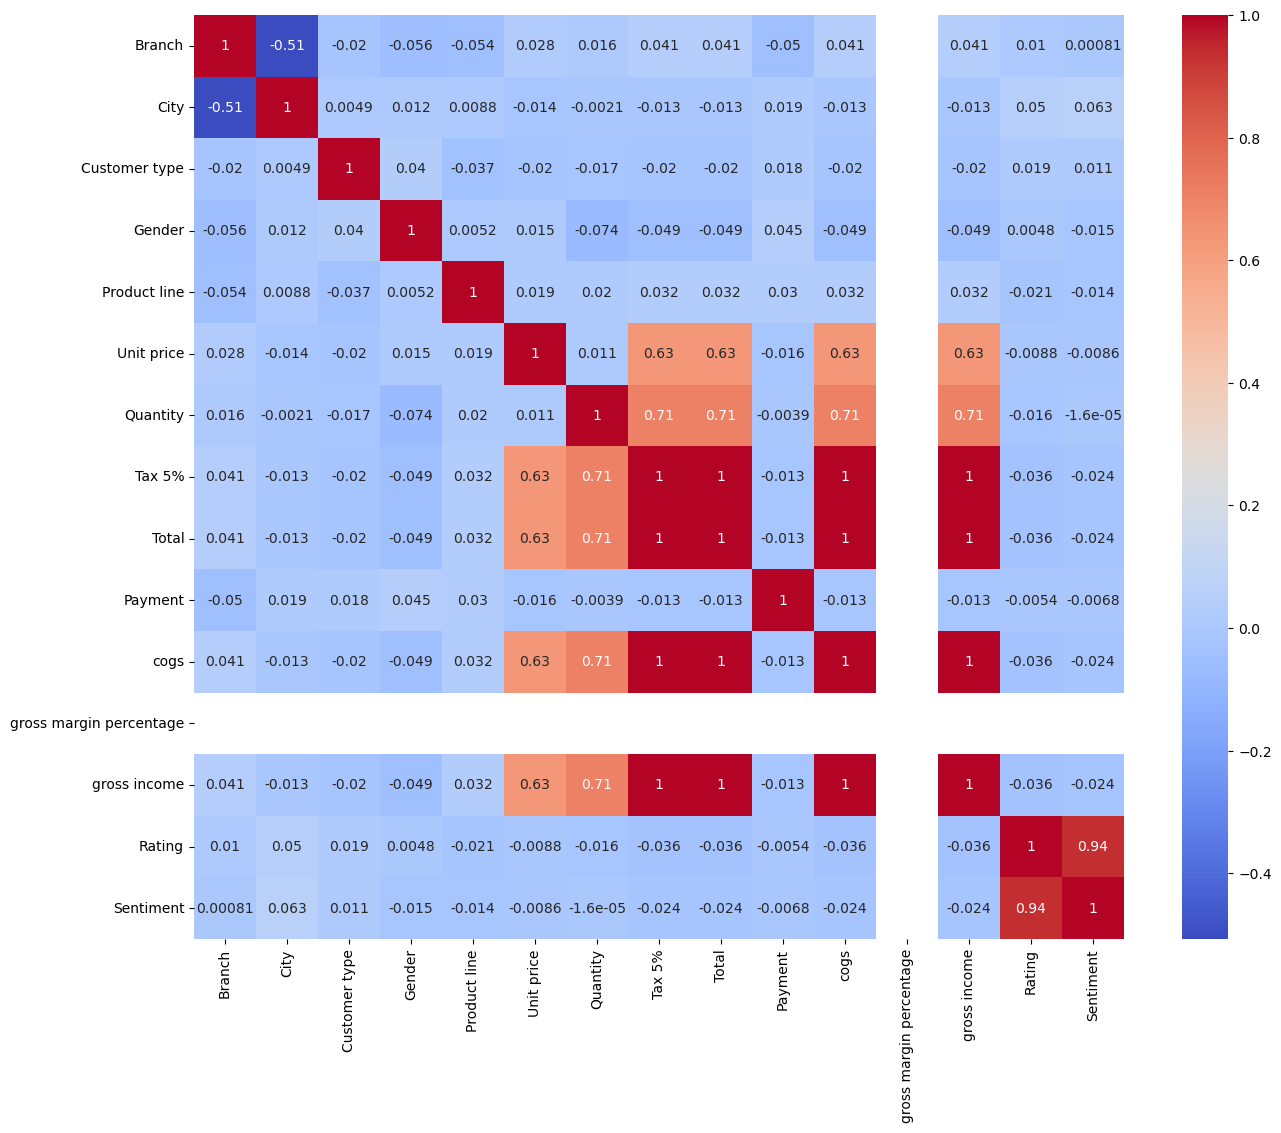

In [29]:
# Visualising the correlation matrix using a heatmap
# The seaborn library's heatmap is used with correlation values annotated
correlation_matrix = df.corr()

# Setting the size of the plot
plt.figure(figsize=(15, 12))  # Adjust the values as needed

# Create the heatmap with annotated correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

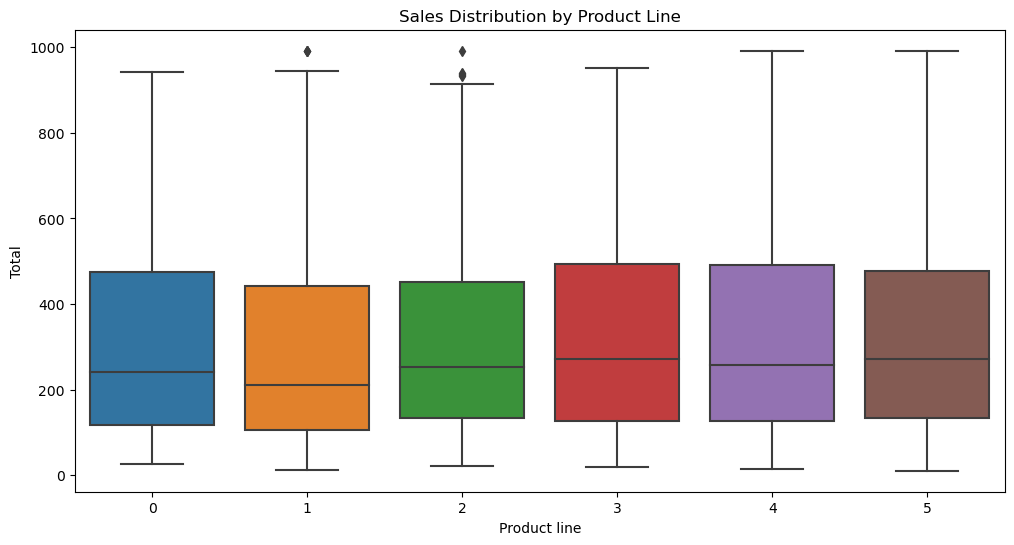

In [30]:
# Visualising sales distribution by product line using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product line", y="Total", data=df)
plt.title("Sales Distribution by Product Line")
plt.show()

In [31]:
# Distribution of Numerical Features
fig_dist_numerical = px.histogram(df, x="Unit price", title="Distribution of Unit Price")
fig_dist_numerical.update_layout(bargap=0.1)
fig_dist_numerical.update_xaxes(title_text="Unit Price")
fig_dist_numerical.update_yaxes(title_text="Count")
fig_dist_numerical.show()


In [32]:
# Correlation Analysis - Scatter Matrix
fig_scatter_matrix = px.scatter_matrix(df, dimensions=["Unit price", "Quantity", "Tax 5%", "Rating", "Total"],
                                      title="Scatter Matrix of Numerical Features")

# Manually set diagonal_visible to False for each subplot
for i in range(len(fig_scatter_matrix.data)):
    fig_scatter_matrix.update_traces(diagonal_visible=False, selector=dict(type='scatter', row=i, col=i))

fig_scatter_matrix.show()

## Model Building Lasso and Ridge Regression

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time


# Define features (X) and target variable (y)
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split or Cross-Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling - Lasso Regression
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)

# Training time for Lasso Regression
start_time = time.time()
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_training_time = time.time() - start_time

# Testing time for Lasso Regression
start_time = time.time()
lasso_pred = lasso_best.predict(X_test)
lasso_testing_time = time.time() - start_time

# Modeling - Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)

# Training time for Ridge Regression
start_time = time.time()
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_training_time = time.time() - start_time

# Testing time for Ridge Regression
start_time = time.time()
ridge_pred = ridge_best.predict(X_test)
ridge_testing_time = time.time() - start_time

# Evaluate models
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_mae = mean_absolute_error(y_test, lasso_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression MAE: {lasso_mae}")
print(f"Lasso Regression Training Time: {lasso_training_time} seconds")
print(f"Lasso Regression Testing Time: {lasso_testing_time} seconds")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression Training Time: {ridge_training_time} seconds")
print(f"Ridge Regression Testing Time: {ridge_testing_time} seconds")

Lasso Regression RMSE: 0.004577426420253069
Lasso Regression MAE: 0.0037533337868420258
Lasso Regression Training Time: 0.09624695777893066 seconds
Lasso Regression Testing Time: 0.0003688335418701172 seconds
Ridge Regression RMSE: 1.6602081280385867e-08
Ridge Regression MAE: 1.2304493317571997e-08
Ridge Regression Training Time: 0.049697160720825195 seconds
Ridge Regression Testing Time: 0.0003020763397216797 seconds


## Neural Network

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

# Define features (X) and target variable (y)
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Sequential model, MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training time for Neural Network
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
nn_training_time = time.time() - start_time

# Testing time for Neural Network
start_time = time.time()
nn_pred = model.predict(X_test_scaled).flatten()
nn_testing_time = time.time() - start_time

# Evaluate the model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_mae = mean_absolute_error(y_test, nn_pred)

print(f"Neural Network RMSE: {nn_rmse}")
print(f"Neural Network MAE: {nn_mae}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

7/7 [==============================] - 0s 564us/step
Neural Network RMSE: 32.83890790482545
Neural Network MAE: 27.306408385772706
Neural Network Training Time: 1.2082507610321045 seconds
Neural Network Testing Time: 0.06588411331176758 seconds


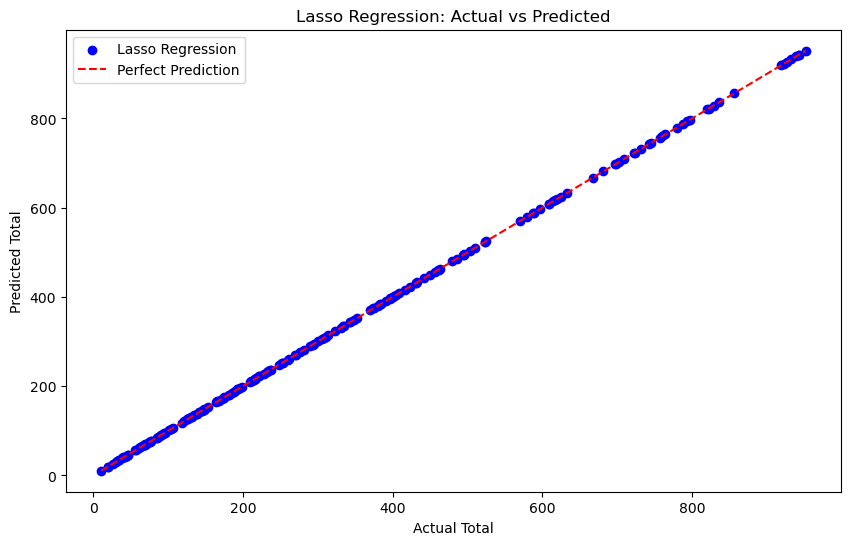

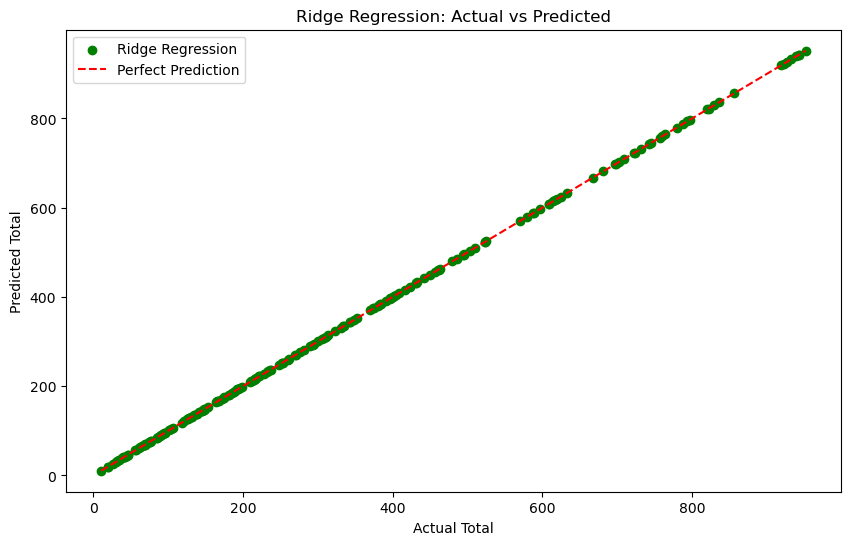

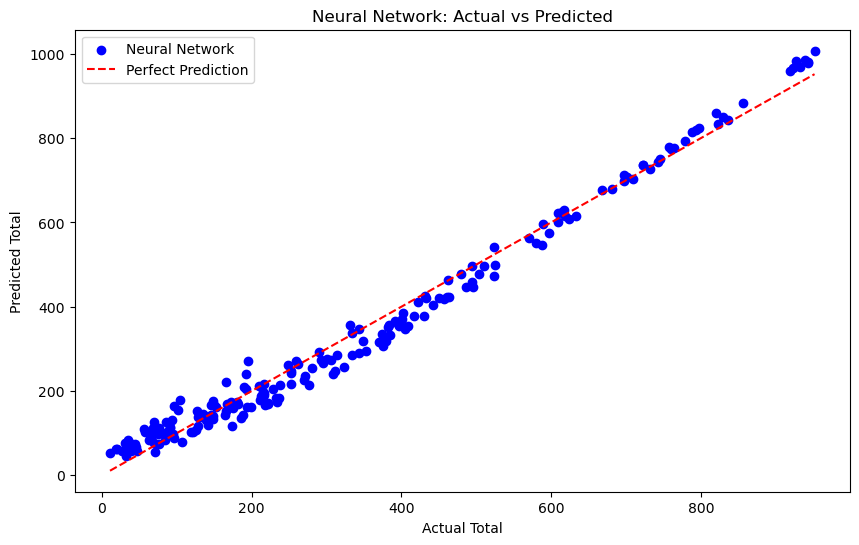

In [35]:
# Plotting Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='blue', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

# Plotting Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

# Plotting Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_pred, color='blue', label='Neural Network')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

##  Feature Importance

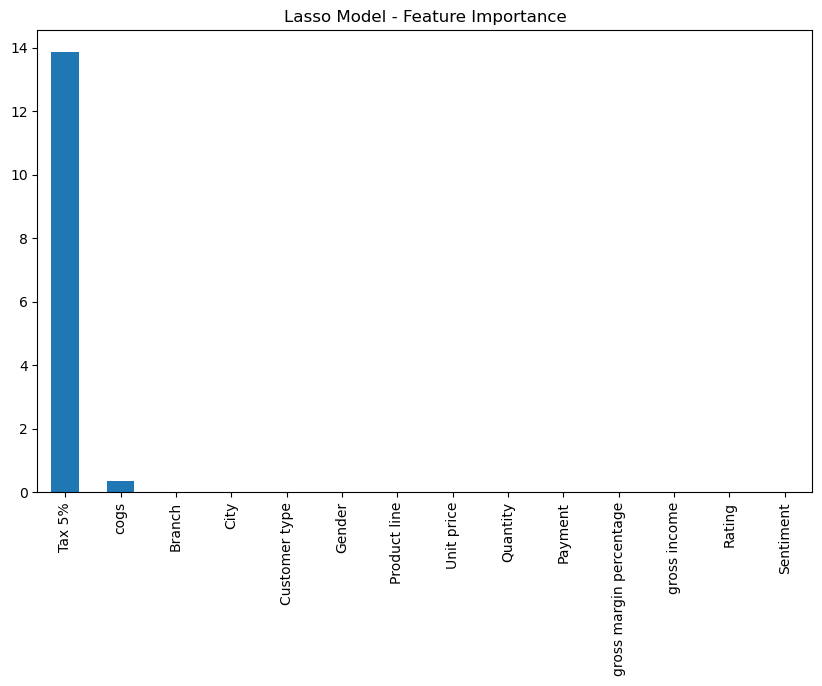

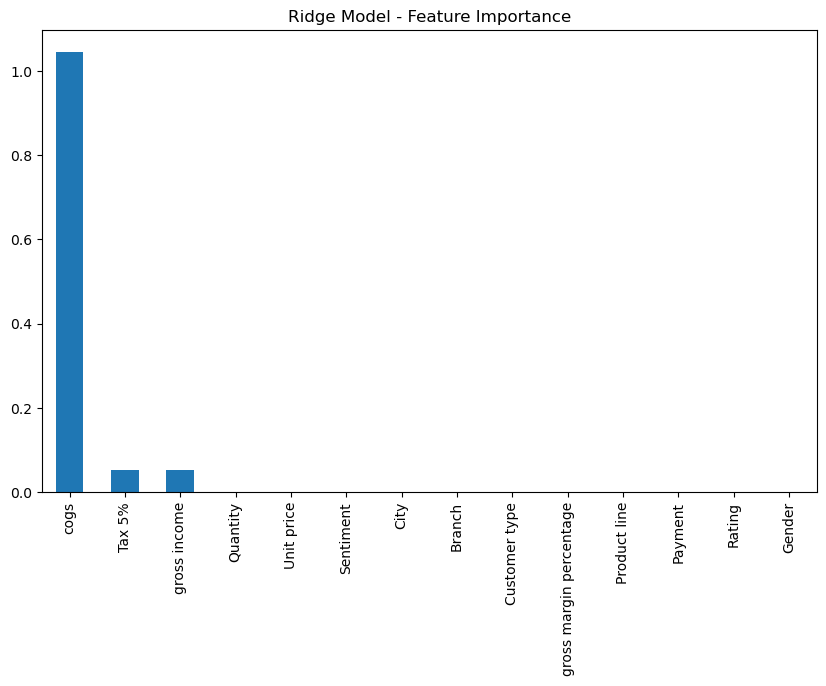

In [36]:
def plot_feature_importance(model, feature_names, title):
    importance = model.coef_  
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(title)
    plt.show()

plot_feature_importance(lasso_best, X.columns, 'Lasso Model - Feature Importance')
plot_feature_importance(ridge_best, X.columns, 'Ridge Model - Feature Importance')

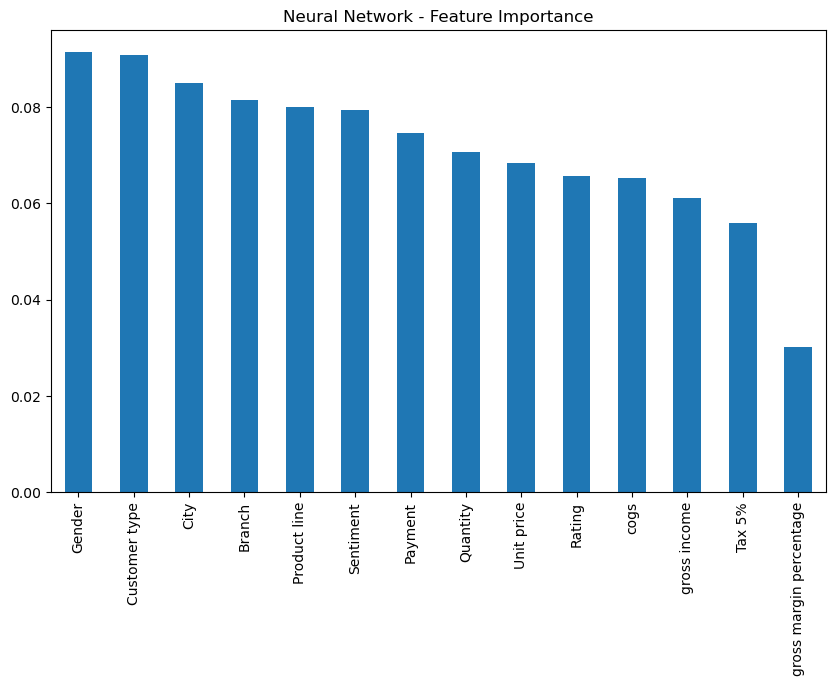

In [37]:
# Define a function to plot feature importance for Neural Network
def plot_nn_feature_importance(model, feature_names, title):
    # Extract weights from the model
    weights = model.get_weights()[0]  

    # Calculate feature importance by summing up absolute weights
    feature_importance = np.sum(np.abs(weights), axis=1)
    feature_importance /= np.sum(feature_importance)  # Normalize to make the sum equal to 1

    # Create a Series for plotting
    feature_importance_series = pd.Series(feature_importance, index=feature_names)
    feature_importance_series = feature_importance_series.sort_values(ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    feature_importance_series.plot(kind='bar')
    plt.title(title)
    plt.show()

plot_nn_feature_importance(model, X.columns, 'Neural Network - Feature Importance')

## Hyperparameter Tuning with Optuna

In [39]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import time


# Lasso Regression
def lasso_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lasso = Lasso(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    lasso.fit(X_train, y_train)
    lasso_training_time = time.time() - start_time
    y_pred = lasso.predict(X_test)
    lasso_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, lasso_training_time, lasso_testing_time

# Ridge Regression
def ridge_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ridge = Ridge(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    ridge.fit(X_train, y_train)
    ridge_training_time = time.time() - start_time
    y_pred = ridge.predict(X_test)
    ridge_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, ridge_training_time, ridge_testing_time

# Define the Optuna objective function
def nn_objective(trial):
    start_time = time.time()
    # Hyperparameters to be optimized
    n_units_1 = trial.suggest_int('n_units_1', 10, 100)
    n_units_2 = trial.suggest_int('n_units_2', 10, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Build the model
    model = Sequential()
    model.add(Dense(n_units_1, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(n_units_2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    nn_training_time = time.time() - start_time

    # Make predictions on the test set
    start_time = time.time()
    nn_pred = model.predict(X_test_scaled).flatten()
    nn_testing_time = time.time() - start_time

    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
    nn_mae = mean_absolute_error(y_test, nn_pred)

    return nn_rmse, nn_mae, nn_training_time, nn_testing_time


# Create the Optuna study for Lasso
lasso_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
lasso_study.optimize(lasso_objective, n_trials=100)
best_lasso_trials = lasso_study.best_trials  # Use best_trials instead of best_params
best_lasso_params = best_lasso_trials[0].params
best_lasso_alpha = best_lasso_params['alpha']
lasso_rmse, lasso_mae, lasso_training_time, lasso_testing_time = best_lasso_trials[0].values

# Create the Optuna study for Ridge
ridge_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
ridge_study.optimize(ridge_objective, n_trials=100)
best_ridge_trials = ridge_study.best_trials
best_ridge_params = best_ridge_trials[0].params
best_ridge_alpha = best_ridge_params['alpha']
ridge_rmse, ridge_mae, ridge_training_time, ridge_testing_time = best_ridge_trials[0].values

# Create the Optuna study for Neural Network
nn_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
nn_study.optimize(nn_objective, n_trials=100)
best_nn_trials = nn_study.best_trials
best_nn_params = best_nn_trials[0].params
best_nn_rmse, best_nn_mae, nn_training_time, nn_testing_time = best_nn_trials[0].values

# Printing values
print("Best Lasso Params:", best_lasso_params)
print("Best Lasso Alpha:", best_lasso_alpha)
print("Lasso RMSE:", lasso_rmse)
print("Lasso MAE:", lasso_mae)
print("Lasso Training Time:", lasso_training_time)
print("Lasso Testing Time:", lasso_testing_time)

print("Best Ridge Params:", best_ridge_params)
print("Best Ridge Alpha:", best_ridge_alpha)
print("Ridge RMSE:", ridge_rmse)
print("Ridge MAE:", ridge_mae)
print("Ridge Training Time:", ridge_training_time)
print("Ridge Testing Time:", ridge_testing_time)

print("Best Neural Network Params:", best_nn_params)
print("Best Neural Network RMSE:", best_nn_rmse)
print("Best Neural Network MAE:", best_nn_mae)
print("Neural Network Training Time:", nn_training_time)
print("Neural Network Testing Time:", nn_testing_time)

[I 2024-01-13 18:22:18,280] A new study created in memory with name: no-name-1623962c-4154-4804-adc7-f0748794da77
[I 2024-01-13 18:22:18,304] Trial 0 finished with values: [0.024727226024797225, 0.02027548328978728, 0.0175478458404541, 0.018855810165405273] and parameters: {'alpha': 5.401993119247044}. 
[I 2024-01-13 18:22:18,318] Trial 1 finished with values: [0.020568402241266315, 0.0148011388955066, 0.008471965789794922, 0.009438037872314453] and parameters: {'alpha': 0.00021417952569603504}. 
[I 2024-01-13 18:22:18,332] Trial 2 finished with values: [0.40812251964094803, 0.3346465680731847, 0.0028939247131347656, 0.0032949447631835938] and parameters: {'alpha': 89.15982086664621}. 
[I 2024-01-13 18:22:18,365] Trial 3 finished with values: [0.019959048510510852, 0.014329169583990735, 0.0074748992919921875, 0.008022069931030273] and parameters: {'alpha': 0.0006536357864559927}. 
[I 2024-01-13 18:22:18,404] Trial 4 finished with values: [0.020789816924130827, 0.014991112954676344, 0.0

[I 2024-01-13 18:22:19,008] Trial 42 finished with values: [0.0018112576524348285, 0.001485169595187541, 0.013751983642578125, 0.01498103141784668] and parameters: {'alpha': 0.39569345015343993}. 
[I 2024-01-13 18:22:19,024] Trial 43 finished with values: [0.006424729172038029, 0.0047668357597424205, 0.008540868759155273, 0.009776115417480469] and parameters: {'alpha': 0.019179674148243026}. 
[I 2024-01-13 18:22:19,048] Trial 44 finished with values: [0.001372192382578596, 0.0011257082452022615, 0.009345054626464844, 0.010564804077148438] and parameters: {'alpha': 0.057774487489779466}. 
[I 2024-01-13 18:22:19,062] Trial 45 finished with values: [0.0020912206267992895, 0.0017167740520106988, 0.007454872131347656, 0.008704900741577148] and parameters: {'alpha': 0.05621559272157858}. 
[I 2024-01-13 18:22:19,078] Trial 46 finished with values: [0.0038232627192380637, 0.003134945233993882, 0.013518810272216797, 0.014003992080688477] and parameters: {'alpha': 0.835242856701378}. 
[I 2024-01

[I 2024-01-13 18:22:19,697] Trial 84 finished with values: [0.004647361693409743, 0.0038155934632308507, 0.002928018569946289, 0.003790140151977539] and parameters: {'alpha': 0.11359701900625406}. 
[I 2024-01-13 18:22:19,712] Trial 85 finished with values: [0.020980946068374532, 0.015143532871221152, 0.008426904678344727, 0.009855031967163086] and parameters: {'alpha': 1.2635942788051013e-05}. 
[I 2024-01-13 18:22:19,738] Trial 86 finished with values: [0.0020330870443015982, 0.0016670621424287456, 0.014573097229003906, 0.016076087951660156] and parameters: {'alpha': 0.44415504654848087}. 
[I 2024-01-13 18:22:19,752] Trial 87 finished with values: [0.12420701755759503, 0.10184552470376083, 0.003690004348754883, 0.00496673583984375] and parameters: {'alpha': 27.134683588552818}. 
[I 2024-01-13 18:22:19,760] Trial 88 finished with values: [0.1417118083843656, 0.11619885708093548, 0.0040171146392822266, 0.004414081573486328] and parameters: {'alpha': 30.958839177407313}. 
[I 2024-01-13 18

[I 2024-01-13 18:22:20,346] Trial 25 finished with values: [9.663784230547829e-10, 7.162204873623068e-10, 0.0020799636840820312, 0.002836942672729492] and parameters: {'alpha': 5.821028010365618e-05}. 
[I 2024-01-13 18:22:20,351] Trial 26 finished with values: [1.5353831461192414e-05, 1.1379977556691401e-05, 0.001802682876586914, 0.002257823944091797] and parameters: {'alpha': 0.925408745051998}. 
[I 2024-01-13 18:22:20,357] Trial 27 finished with values: [8.883797657180773e-07, 6.584172182932946e-07, 0.002103090286254883, 0.003068208694458008] and parameters: {'alpha': 0.0535120923215677}. 
[I 2024-01-13 18:22:20,367] Trial 28 finished with values: [2.3250393652942637e-10, 1.7231996274347239e-10, 0.004442930221557617, 0.0059587955474853516] and parameters: {'alpha': 1.4001297592737572e-05}. 
[I 2024-01-13 18:22:20,374] Trial 29 finished with values: [1.5265708494386171e-06, 1.131411242152325e-06, 0.0032367706298828125, 0.0036919116973876953] and parameters: {'alpha': 0.091956364658412

[I 2024-01-13 18:22:20,640] Trial 66 finished with values: [1.1272588703587056e-06, 8.354617268402364e-07, 0.001220703125, 0.0015728473663330078] and parameters: {'alpha': 0.06790179091303437}. 
[I 2024-01-13 18:22:20,646] Trial 67 finished with values: [2.281533530217769e-07, 1.690940470400193e-07, 0.0023088455200195312, 0.0032329559326171875] and parameters: {'alpha': 0.013742564349232428}. 
[I 2024-01-13 18:22:20,653] Trial 68 finished with values: [7.174374819211457e-08, 5.317228042756028e-08, 0.002245187759399414, 0.0030519962310791016] and parameters: {'alpha': 0.004321378260080044}. 
[I 2024-01-13 18:22:20,660] Trial 69 finished with values: [2.2882070483388313e-05, 1.6960199060092052e-05, 0.001603841781616211, 0.002126932144165039] and parameters: {'alpha': 1.3795866592704324}. 
[I 2024-01-13 18:22:20,664] Trial 70 finished with values: [0.00016065063736013781, 0.00011911691385609658, 0.001558065414428711, 0.00201416015625] and parameters: {'alpha': 9.741118709034653}. 
[I 2024

7/7 [==============================] - 0s 513us/step


[I 2024-01-13 18:22:22,007] Trial 0 finished with values: [421.97964555270494, 336.29874974207996, 1.1041488647460938, 0.04277515411376953] and parameters: {'n_units_1': 34, 'n_units_2': 82, 'learning_rate': 2.0301236925957028e-05}. 


7/7 [==============================] - 0s 460us/step


[I 2024-01-13 18:22:23,138] Trial 1 finished with values: [13.219561858559473, 10.437164887695312, 1.0920441150665283, 0.0381622314453125] and parameters: {'n_units_1': 53, 'n_units_2': 72, 'learning_rate': 0.003199293598937765}. 


7/7 [==============================] - 0s 433us/step


[I 2024-01-13 18:22:24,166] Trial 2 finished with values: [84.89291862976474, 70.93300886898041, 0.9915199279785156, 0.03496885299682617] and parameters: {'n_units_1': 24, 'n_units_2': 10, 'learning_rate': 0.0006626025247640326}. 


7/7 [==============================] - 0s 441us/step


[I 2024-01-13 18:22:25,268] Trial 3 finished with values: [421.8343502448066, 336.150460715909, 1.0472869873046875, 0.054628849029541016] and parameters: {'n_units_1': 76, 'n_units_2': 65, 'learning_rate': 1.2389964474357661e-05}. 


7/7 [==============================] - 0s 408us/step


[I 2024-01-13 18:22:26,251] Trial 4 finished with values: [415.1462004497376, 330.2256294346046, 0.9492039680480957, 0.03245997428894043] and parameters: {'n_units_1': 76, 'n_units_2': 12, 'learning_rate': 7.795149312650568e-05}. 


7/7 [==============================] - 0s 433us/step


[I 2024-01-13 18:22:27,306] Trial 5 finished with values: [416.67098226943676, 331.2853009975147, 1.0187458992004395, 0.03510594367980957] and parameters: {'n_units_1': 76, 'n_units_2': 65, 'learning_rate': 3.7393055839048655e-05}. 


7/7 [==============================] - 0s 403us/step


[I 2024-01-13 18:22:28,444] Trial 6 finished with values: [420.8117465901827, 334.860352203269, 1.1066148281097412, 0.031507015228271484] and parameters: {'n_units_1': 92, 'n_units_2': 62, 'learning_rate': 1.9583155902448058e-05}. 


7/7 [==============================] - 0s 493us/step


[I 2024-01-13 18:22:29,473] Trial 7 finished with values: [66.54769898087756, 56.86775707458495, 0.9921729564666748, 0.035144805908203125] and parameters: {'n_units_1': 96, 'n_units_2': 55, 'learning_rate': 0.0003094395976240022}. 


7/7 [==============================] - 0s 382us/step


[I 2024-01-13 18:22:30,515] Trial 8 finished with values: [48.180195083489004, 40.14420065414429, 1.009680986404419, 0.03174304962158203] and parameters: {'n_units_1': 55, 'n_units_2': 20, 'learning_rate': 0.0006921180467613079}. 


7/7 [==============================] - 0s 394us/step


[I 2024-01-13 18:22:31,464] Trial 9 finished with values: [88.86154100360822, 75.84277434722901, 0.9165451526641846, 0.031533002853393555] and parameters: {'n_units_1': 16, 'n_units_2': 70, 'learning_rate': 0.0003545611025106115}. 


7/7 [==============================] - 0s 404us/step


[I 2024-01-13 18:22:32,453] Trial 10 finished with values: [420.7362578199226, 334.9198415047121, 0.9562699794769287, 0.032473087310791016] and parameters: {'n_units_1': 93, 'n_units_2': 88, 'learning_rate': 2.260444203197893e-05}. 


7/7 [==============================] - 0s 393us/step


[I 2024-01-13 18:22:33,418] Trial 11 finished with values: [14.578729760665599, 11.296589127120972, 0.9327759742736816, 0.031625986099243164] and parameters: {'n_units_1': 98, 'n_units_2': 37, 'learning_rate': 0.0027565096616383516}. 


7/7 [==============================] - 0s 412us/step


[I 2024-01-13 18:22:34,383] Trial 12 finished with values: [71.35642590603639, 59.2228717024994, 0.9312760829925537, 0.03240489959716797] and parameters: {'n_units_1': 84, 'n_units_2': 15, 'learning_rate': 0.0004491462835233273}. 


7/7 [==============================] - 0s 404us/step


[I 2024-01-13 18:22:35,556] Trial 13 finished with values: [423.4206448403487, 337.8675937294033, 1.1410191059112549, 0.031375885009765625] and parameters: {'n_units_1': 12, 'n_units_2': 35, 'learning_rate': 3.061495183925225e-05}. 


7/7 [==============================] - 0s 390us/step


[I 2024-01-13 18:22:36,571] Trial 14 finished with values: [8.88056528071687, 6.9766433623504645, 0.9817860126495361, 0.032972097396850586] and parameters: {'n_units_1': 75, 'n_units_2': 97, 'learning_rate': 0.004486138513048416}. 


7/7 [==============================] - 0s 391us/step


[I 2024-01-13 18:22:37,571] Trial 15 finished with values: [39.242076348920875, 32.84268586578369, 0.9670400619506836, 0.03182101249694824] and parameters: {'n_units_1': 89, 'n_units_2': 90, 'learning_rate': 0.0005282364994699571}. 


7/7 [==============================] - 0s 401us/step


[I 2024-01-13 18:22:38,523] Trial 16 finished with values: [25.194900136978934, 20.445748805770872, 0.919497013092041, 0.031603097915649414] and parameters: {'n_units_1': 81, 'n_units_2': 10, 'learning_rate': 0.001751045904270458}. 


7/7 [==============================] - 0s 402us/step


[I 2024-01-13 18:22:39,485] Trial 17 finished with values: [422.577096335978, 337.1457108286959, 0.9301102161407471, 0.03176403045654297] and parameters: {'n_units_1': 66, 'n_units_2': 45, 'learning_rate': 1.0452594461171683e-05}. 


7/7 [==============================] - 0s 398us/step


[I 2024-01-13 18:22:40,439] Trial 18 finished with values: [416.3518747055549, 331.0940684867096, 0.9213581085205078, 0.03172183036804199] and parameters: {'n_units_1': 41, 'n_units_2': 43, 'learning_rate': 5.0020628412157996e-05}. 


7/7 [==============================] - 0s 411us/step


[I 2024-01-13 18:22:41,420] Trial 19 finished with values: [15.3689519826932, 12.378255335540771, 0.9472918510437012, 0.03270411491394043] and parameters: {'n_units_1': 53, 'n_units_2': 99, 'learning_rate': 0.0023616922042625946}. 


7/7 [==============================] - 0s 399us/step


[I 2024-01-13 18:22:42,423] Trial 20 finished with values: [418.2667975025219, 332.7278542959881, 0.9706258773803711, 0.03162193298339844] and parameters: {'n_units_1': 87, 'n_units_2': 99, 'learning_rate': 2.8947413675875848e-05}. 


7/7 [==============================] - 0s 575us/step


[I 2024-01-13 18:22:43,674] Trial 21 finished with values: [415.70137506423634, 330.10874144675256, 1.2107069492340088, 0.03961014747619629] and parameters: {'n_units_1': 94, 'n_units_2': 93, 'learning_rate': 3.151958403618428e-05}. 


7/7 [==============================] - 0s 399us/step


[I 2024-01-13 18:22:44,672] Trial 22 finished with values: [30.44694946253632, 24.847737244033816, 0.9651970863342285, 0.03258371353149414] and parameters: {'n_units_1': 51, 'n_units_2': 39, 'learning_rate': 0.0013159020532690407}. 


7/7 [==============================] - 0s 402us/step


[I 2024-01-13 18:22:45,625] Trial 23 finished with values: [76.40309784045306, 64.14228105697632, 0.9196679592132568, 0.03227090835571289] and parameters: {'n_units_1': 42, 'n_units_2': 38, 'learning_rate': 0.0003939583678917522}. 


7/7 [==============================] - 0s 400us/step


[I 2024-01-13 18:22:46,584] Trial 24 finished with values: [379.8446609744448, 302.3536516779518, 0.9263858795166016, 0.031889915466308594] and parameters: {'n_units_1': 63, 'n_units_2': 52, 'learning_rate': 9.809866059190692e-05}. 


7/7 [==============================] - 0s 392us/step


[I 2024-01-13 18:22:47,533] Trial 25 finished with values: [10.913686262643314, 8.473425683898927, 0.9163620471954346, 0.031896114349365234] and parameters: {'n_units_1': 46, 'n_units_2': 12, 'learning_rate': 0.0058257015527459445}. 


7/7 [==============================] - 0s 391us/step


[I 2024-01-13 18:22:48,529] Trial 26 finished with values: [25.580979077394698, 20.310752811431886, 0.9640157222747803, 0.03157305717468262] and parameters: {'n_units_1': 88, 'n_units_2': 98, 'learning_rate': 0.0011625732002044017}. 


7/7 [==============================] - 0s 427us/step


[I 2024-01-13 18:22:49,610] Trial 27 finished with values: [27.693116860868766, 22.547003158721928, 1.0475897789001465, 0.03282928466796875] and parameters: {'n_units_1': 29, 'n_units_2': 83, 'learning_rate': 0.0016459726988099358}. 


7/7 [==============================] - 0s 447us/step


[I 2024-01-13 18:22:50,640] Trial 28 finished with values: [58.18607569372755, 49.00628361221314, 0.9906442165374756, 0.03792095184326172] and parameters: {'n_units_1': 96, 'n_units_2': 31, 'learning_rate': 0.00043441755300883104}. 


7/7 [==============================] - 0s 439us/step


[I 2024-01-13 18:22:51,693] Trial 29 finished with values: [405.77387953230823, 322.5193527656651, 1.0203120708465576, 0.03261518478393555] and parameters: {'n_units_1': 10, 'n_units_2': 37, 'learning_rate': 0.00015185642532403794}. 


7/7 [==============================] - 0s 400us/step


[I 2024-01-13 18:22:52,681] Trial 30 finished with values: [25.68199402005245, 20.270012225875853, 0.954024076461792, 0.03284096717834473] and parameters: {'n_units_1': 67, 'n_units_2': 83, 'learning_rate': 0.001349959417942952}. 


7/7 [==============================] - 0s 384us/step


[I 2024-01-13 18:22:53,633] Trial 31 finished with values: [29.39063452552476, 23.691700449218747, 0.9188718795776367, 0.03270721435546875] and parameters: {'n_units_1': 25, 'n_units_2': 89, 'learning_rate': 0.0016737102878391012}. 


7/7 [==============================] - 0s 532us/step


[I 2024-01-13 18:22:54,670] Trial 32 finished with values: [8.181426357363195, 6.49451077102661, 0.9970748424530029, 0.03924393653869629] and parameters: {'n_units_1': 65, 'n_units_2': 55, 'learning_rate': 0.006726689389206155}. 


7/7 [==============================] - 0s 411us/step


[I 2024-01-13 18:22:55,686] Trial 33 finished with values: [7.493589591377205, 5.881662982635497, 0.9822330474853516, 0.03249001502990723] and parameters: {'n_units_1': 58, 'n_units_2': 61, 'learning_rate': 0.005397173825181389}. 


7/7 [==============================] - 0s 381us/step


[I 2024-01-13 18:22:56,635] Trial 34 finished with values: [7.381299985728957, 5.52521711235046, 0.9167017936706543, 0.03168511390686035] and parameters: {'n_units_1': 16, 'n_units_2': 56, 'learning_rate': 0.009406313647457249}. 


7/7 [==============================] - 0s 405us/step


[I 2024-01-13 18:22:57,582] Trial 35 finished with values: [9.351435482536832, 7.418199273300172, 0.9141099452972412, 0.032070159912109375] and parameters: {'n_units_1': 41, 'n_units_2': 54, 'learning_rate': 0.006050027780310572}. 


7/7 [==============================] - 0s 362us/step


[I 2024-01-13 18:22:58,532] Trial 36 finished with values: [415.8658472154785, 331.44347454907415, 0.9173810482025146, 0.031623125076293945] and parameters: {'n_units_1': 36, 'n_units_2': 73, 'learning_rate': 4.066023054541074e-05}. 


7/7 [==============================] - 0s 423us/step


[I 2024-01-13 18:22:59,545] Trial 37 finished with values: [12.202724031678352, 9.884928816528321, 0.9784541130065918, 0.03451800346374512] and parameters: {'n_units_1': 63, 'n_units_2': 82, 'learning_rate': 0.003336161020325069}. 


7/7 [==============================] - 0s 395us/step


[I 2024-01-13 18:23:00,507] Trial 38 finished with values: [87.70764944004773, 73.7696112310791, 0.9290361404418945, 0.031717777252197266] and parameters: {'n_units_1': 66, 'n_units_2': 21, 'learning_rate': 0.00033830321108306474}. 


7/7 [==============================] - 0s 401us/step


[I 2024-01-13 18:23:01,463] Trial 39 finished with values: [49.26129965590898, 41.339803544769296, 0.9238779544830322, 0.03176999092102051] and parameters: {'n_units_1': 48, 'n_units_2': 69, 'learning_rate': 0.0005034714818426592}. 


7/7 [==============================] - 0s 395us/step


[I 2024-01-13 18:23:02,416] Trial 40 finished with values: [417.1291700342655, 331.76831957044124, 0.9206829071044922, 0.03187894821166992] and parameters: {'n_units_1': 35, 'n_units_2': 71, 'learning_rate': 5.245123882380621e-05}. 


7/7 [==============================] - 0s 538us/step


[I 2024-01-13 18:23:03,492] Trial 41 finished with values: [421.4954328200426, 335.2553130532992, 1.035902976989746, 0.03853106498718262] and parameters: {'n_units_1': 12, 'n_units_2': 23, 'learning_rate': 5.671068564581142e-05}. 


7/7 [==============================] - 0s 413us/step


[I 2024-01-13 18:23:04,584] Trial 42 finished with values: [381.1395885302091, 300.3368927528, 1.059584140777588, 0.03138899803161621] and parameters: {'n_units_1': 81, 'n_units_2': 81, 'learning_rate': 7.577911236667032e-05}. 


7/7 [==============================] - 0s 392us/step


[I 2024-01-13 18:23:05,530] Trial 43 finished with values: [26.42912436021788, 20.894155562210084, 0.9143071174621582, 0.031742095947265625] and parameters: {'n_units_1': 10, 'n_units_2': 28, 'learning_rate': 0.0039017638443110173}. 


7/7 [==============================] - 0s 578us/step


[I 2024-01-13 18:23:06,493] Trial 44 finished with values: [9.773926941008547, 7.687967323265076, 0.9243471622467041, 0.037309885025024414] and parameters: {'n_units_1': 28, 'n_units_2': 93, 'learning_rate': 0.004800678504162057}. 


7/7 [==============================] - 0s 424us/step


[I 2024-01-13 18:23:07,577] Trial 45 finished with values: [14.571700362763817, 11.158435520095827, 1.0508012771606445, 0.03291583061218262] and parameters: {'n_units_1': 22, 'n_units_2': 74, 'learning_rate': 0.005155152350672557}. 


7/7 [==============================] - 0s 416us/step


[I 2024-01-13 18:23:08,847] Trial 46 finished with values: [19.34015763551783, 14.989551507720947, 1.2368950843811035, 0.032353878021240234] and parameters: {'n_units_1': 67, 'n_units_2': 48, 'learning_rate': 0.0020336213238128734}. 


7/7 [==============================] - 0s 387us/step


[I 2024-01-13 18:23:09,816] Trial 47 finished with values: [419.2736923357937, 334.1476896894169, 0.9361457824707031, 0.03157305717468262] and parameters: {'n_units_1': 46, 'n_units_2': 23, 'learning_rate': 4.8705110684348347e-05}. 


7/7 [==============================] - 0s 416us/step


[I 2024-01-13 18:23:10,810] Trial 48 finished with values: [218.38957609815833, 179.84171230239866, 0.9611241817474365, 0.03199887275695801] and parameters: {'n_units_1': 74, 'n_units_2': 97, 'learning_rate': 0.00012720256221468448}. 


7/7 [==============================] - 0s 397us/step


[I 2024-01-13 18:23:11,792] Trial 49 finished with values: [287.31663547565876, 228.58287526420594, 0.949918270111084, 0.03168082237243652] and parameters: {'n_units_1': 55, 'n_units_2': 77, 'learning_rate': 0.00014308280481848204}. 


7/7 [==============================] - 0s 406us/step


[I 2024-01-13 18:23:12,790] Trial 50 finished with values: [180.98361669602315, 153.14623725105284, 0.9640629291534424, 0.03304290771484375] and parameters: {'n_units_1': 92, 'n_units_2': 77, 'learning_rate': 0.00013537268083797238}. 


7/7 [==============================] - 0s 399us/step


[I 2024-01-13 18:23:13,755] Trial 51 finished with values: [9.974506659139934, 7.835444891967772, 0.9323828220367432, 0.03203892707824707] and parameters: {'n_units_1': 71, 'n_units_2': 48, 'learning_rate': 0.004446378028556768}. 


7/7 [==============================] - 0s 482us/step


[I 2024-01-13 18:23:14,784] Trial 52 finished with values: [422.9493574407428, 337.63115745774513, 0.9894928932189941, 0.039025306701660156] and parameters: {'n_units_1': 16, 'n_units_2': 25, 'learning_rate': 2.0189233273237704e-05}. 


7/7 [==============================] - 0s 435us/step


[I 2024-01-13 18:23:15,875] Trial 53 finished with values: [7.126045993986947, 5.66352130027771, 1.0566980838775635, 0.03332209587097168] and parameters: {'n_units_1': 49, 'n_units_2': 99, 'learning_rate': 0.009406313647457249}. 


7/7 [==============================] - 0s 395us/step


[I 2024-01-13 18:23:16,855] Trial 54 finished with values: [15.274153035504595, 11.742103519439697, 0.9471759796142578, 0.03200197219848633] and parameters: {'n_units_1': 87, 'n_units_2': 43, 'learning_rate': 0.0023616922042625946}. 


7/7 [==============================] - 0s 389us/step


[I 2024-01-13 18:23:17,810] Trial 55 finished with values: [33.76780200528631, 27.466511003265378, 0.9214630126953125, 0.032160043716430664] and parameters: {'n_units_1': 57, 'n_units_2': 10, 'learning_rate': 0.0013159020532690407}. 


7/7 [==============================] - 0s 417us/step


[I 2024-01-13 18:23:18,800] Trial 56 finished with values: [421.5214966788377, 335.80826043905734, 0.9572317600250244, 0.03207230567932129] and parameters: {'n_units_1': 76, 'n_units_2': 90, 'learning_rate': 1.2389964474357661e-05}. 


7/7 [==============================] - 0s 497us/step


[I 2024-01-13 18:23:19,809] Trial 57 finished with values: [419.8980717827221, 334.4131646663141, 0.9703958034515381, 0.03795599937438965] and parameters: {'n_units_1': 93, 'n_units_2': 88, 'learning_rate': 2.260444203197893e-05}. 


7/7 [==============================] - 0s 401us/step


[I 2024-01-13 18:23:20,923] Trial 58 finished with values: [289.44822689245876, 240.10336173536302, 1.0809299945831299, 0.03266787528991699] and parameters: {'n_units_1': 24, 'n_units_2': 89, 'learning_rate': 0.00016751951826067337}. 


7/7 [==============================] - 0s 399us/step


[I 2024-01-13 18:23:21,889] Trial 59 finished with values: [17.753627573343397, 13.708128993606564, 0.9329321384429932, 0.032208919525146484] and parameters: {'n_units_1': 53, 'n_units_2': 57, 'learning_rate': 0.0023616922042625946}. 


7/7 [==============================] - 0s 389us/step


[I 2024-01-13 18:23:22,877] Trial 60 finished with values: [413.33222477910596, 327.5676594495964, 0.955103874206543, 0.03192138671875] and parameters: {'n_units_1': 96, 'n_units_2': 73, 'learning_rate': 4.066023054541074e-05}. 


7/7 [==============================] - 0s 389us/step


[I 2024-01-13 18:23:23,837] Trial 61 finished with values: [60.61053949821958, 51.38221428771973, 0.9261069297790527, 0.03284192085266113] and parameters: {'n_units_1': 59, 'n_units_2': 31, 'learning_rate': 0.00043441755300883104}. 


7/7 [==============================] - 0s 386us/step


[I 2024-01-13 18:23:24,790] Trial 62 finished with values: [396.08311873959457, 313.0003841107941, 0.9200522899627686, 0.032240867614746094] and parameters: {'n_units_1': 13, 'n_units_2': 83, 'learning_rate': 0.00012720256221468448}. 


7/7 [==============================] - 0s 402us/step


[I 2024-01-13 18:23:25,738] Trial 63 finished with values: [419.01743340914305, 333.55181615771767, 0.9154858589172363, 0.031832218170166016] and parameters: {'n_units_1': 41, 'n_units_2': 13, 'learning_rate': 5.0020628412157996e-05}. 


7/7 [==============================] - 0s 392us/step


[I 2024-01-13 18:23:26,689] Trial 64 finished with values: [23.149381618148894, 17.693030270004268, 0.9168541431427002, 0.03337907791137695] and parameters: {'n_units_1': 12, 'n_units_2': 73, 'learning_rate': 0.004486138513048416}. 


7/7 [==============================] - 0s 390us/step


[I 2024-01-13 18:23:27,635] Trial 65 finished with values: [28.30068716198059, 22.63732473297119, 0.9138541221618652, 0.03202986717224121] and parameters: {'n_units_1': 25, 'n_units_2': 68, 'learning_rate': 0.0019062669934493486}. 


7/7 [==============================] - 0s 412us/step


[I 2024-01-13 18:23:28,591] Trial 66 finished with values: [10.394798211754129, 8.027731246719359, 0.9228098392486572, 0.03188610076904297] and parameters: {'n_units_1': 16, 'n_units_2': 56, 'learning_rate': 0.009406313647457249}. 


7/7 [==============================] - 0s 384us/step


[I 2024-01-13 18:23:29,539] Trial 67 finished with values: [29.76864152144651, 24.839773285369873, 0.9161159992218018, 0.03148484230041504] and parameters: {'n_units_1': 10, 'n_units_2': 28, 'learning_rate': 0.0039017638443110173}. 


7/7 [==============================] - 0s 411us/step


[I 2024-01-13 18:23:30,499] Trial 68 finished with values: [16.13767184838141, 12.571322800521852, 0.9270119667053223, 0.032003164291381836] and parameters: {'n_units_1': 45, 'n_units_2': 71, 'learning_rate': 0.0027565096616383516}. 


7/7 [==============================] - 0s 531us/step


[I 2024-01-13 18:23:31,635] Trial 69 finished with values: [10.109479127493799, 7.901361136627197, 1.0893990993499756, 0.04545021057128906] and parameters: {'n_units_1': 67, 'n_units_2': 52, 'learning_rate': 0.005120158815624483}. 


7/7 [==============================] - 0s 395us/step


[I 2024-01-13 18:23:32,741] Trial 70 finished with values: [422.8820371873611, 337.3208380017527, 1.0728302001953125, 0.03231000900268555] and parameters: {'n_units_1': 51, 'n_units_2': 44, 'learning_rate': 1.0452594461171683e-05}. 


7/7 [==============================] - 0s 376us/step


[I 2024-01-13 18:23:33,708] Trial 71 finished with values: [15.919175466046886, 12.53085062332153, 0.9350359439849854, 0.03194904327392578] and parameters: {'n_units_1': 39, 'n_units_2': 98, 'learning_rate': 0.0027565096616383516}. 


7/7 [==============================] - 0s 418us/step


[I 2024-01-13 18:23:34,819] Trial 72 finished with values: [44.24829451676208, 37.05828958190918, 1.0764930248260498, 0.03281116485595703] and parameters: {'n_units_1': 55, 'n_units_2': 93, 'learning_rate': 0.0005282364994699571}. 


7/7 [==============================] - 0s 370us/step


[I 2024-01-13 18:23:35,776] Trial 73 finished with values: [27.831996549723396, 21.981382746810915, 0.9247560501098633, 0.03220009803771973] and parameters: {'n_units_1': 29, 'n_units_2': 91, 'learning_rate': 0.0016459726988099358}. 


7/7 [==============================] - 0s 408us/step


[I 2024-01-13 18:23:36,864] Trial 74 finished with values: [5.41742929175618, 4.258810364608766, 1.0548932552337646, 0.03205108642578125] and parameters: {'n_units_1': 82, 'n_units_2': 56, 'learning_rate': 0.009406313647457249}. 


7/7 [==============================] - 0s 446us/step


[I 2024-01-13 18:23:37,822] Trial 75 finished with values: [17.32488782535914, 13.406044153900147, 0.9225800037384033, 0.03461194038391113] and parameters: {'n_units_1': 34, 'n_units_2': 28, 'learning_rate': 0.0039017638443110173}. 


7/7 [==============================] - 0s 394us/step


[I 2024-01-13 18:23:38,897] Trial 76 finished with values: [12.279417716688336, 9.731183420028687, 1.0428180694580078, 0.031445980072021484] and parameters: {'n_units_1': 63, 'n_units_2': 82, 'learning_rate': 0.003336161020325069}. 


7/7 [==============================] - 0s 618us/step


[I 2024-01-13 18:23:39,975] Trial 77 finished with values: [36.05355305746049, 28.934837488708496, 1.0412120819091797, 0.03603100776672363] and parameters: {'n_units_1': 22, 'n_units_2': 90, 'learning_rate': 0.001349959417942952}. 


7/7 [==============================] - 0s 558us/step


[I 2024-01-13 18:23:41,316] Trial 78 finished with values: [118.37784381268538, 103.91034985809326, 1.2869279384613037, 0.05285215377807617] and parameters: {'n_units_1': 91, 'n_units_2': 38, 'learning_rate': 0.0002036764656836438}. 


7/7 [==============================] - 0s 435us/step


[I 2024-01-13 18:23:42,449] Trial 79 finished with values: [294.5548007844102, 235.48573072273254, 1.0990488529205322, 0.03304314613342285] and parameters: {'n_units_1': 41, 'n_units_2': 97, 'learning_rate': 0.00012720256221468448}. 


7/7 [==============================] - 0s 527us/step


[I 2024-01-13 18:23:43,539] Trial 80 finished with values: [421.32484665101504, 335.59128896148917, 1.0545780658721924, 0.03394293785095215] and parameters: {'n_units_1': 87, 'n_units_2': 45, 'learning_rate': 2.5239940959133368e-05}. 


7/7 [==============================] - 0s 389us/step


[I 2024-01-13 18:23:44,497] Trial 81 finished with values: [26.817937912732035, 21.784931165084842, 0.9257230758666992, 0.03178596496582031] and parameters: {'n_units_1': 24, 'n_units_2': 10, 'learning_rate': 0.004285386465273858}. 


7/7 [==============================] - 0s 418us/step


[I 2024-01-13 18:23:45,519] Trial 82 finished with values: [196.7768389806634, 164.89518924484256, 0.9869389533996582, 0.03380298614501953] and parameters: {'n_units_1': 93, 'n_units_2': 88, 'learning_rate': 0.00012720256221468448}. 


7/7 [==============================] - 0s 407us/step


[I 2024-01-13 18:23:46,499] Trial 83 finished with values: [49.43957894187015, 41.387642530975334, 0.9463317394256592, 0.03282785415649414] and parameters: {'n_units_1': 72, 'n_units_2': 37, 'learning_rate': 0.000456287269384799}. 


7/7 [==============================] - 0s 519us/step


[I 2024-01-13 18:23:48,202] Trial 84 finished with values: [19.952106607877354, 15.566018320388794, 1.666978120803833, 0.03549504280090332] and parameters: {'n_units_1': 17, 'n_units_2': 37, 'learning_rate': 0.005397173825181389}. 


7/7 [==============================] - 0s 542us/step


[I 2024-01-13 18:23:49,294] Trial 85 finished with values: [6.543336523109467, 5.052229464492798, 1.0521838665008545, 0.039260149002075195] and parameters: {'n_units_1': 85, 'n_units_2': 31, 'learning_rate': 0.009406313647457249}. 


7/7 [==============================] - 0s 387us/step


[I 2024-01-13 18:23:50,306] Trial 86 finished with values: [47.68652676384464, 40.4726149697876, 0.9795310497283936, 0.03169417381286621] and parameters: {'n_units_1': 48, 'n_units_2': 69, 'learning_rate': 0.0005034714818426592}. 


7/7 [==============================] - 0s 427us/step


[I 2024-01-13 18:23:51,293] Trial 87 finished with values: [59.59376804124011, 50.5497599987793, 0.9541807174682617, 0.03219199180603027] and parameters: {'n_units_1': 86, 'n_units_2': 55, 'learning_rate': 0.0003094395976240022}. 


7/7 [==============================] - 0s 391us/step


[I 2024-01-13 18:23:52,273] Trial 88 finished with values: [9.153451901543775, 7.444475159683227, 0.9473309516906738, 0.03197121620178223] and parameters: {'n_units_1': 66, 'n_units_2': 74, 'learning_rate': 0.005155152350672557}. 


7/7 [==============================] - 0s 381us/step


[I 2024-01-13 18:23:53,255] Trial 89 finished with values: [416.7574771911481, 331.2255548060131, 0.9489109516143799, 0.031857967376708984] and parameters: {'n_units_1': 76, 'n_units_2': 65, 'learning_rate': 3.7393055839048655e-05}. 


7/7 [==============================] - 0s 461us/step


[I 2024-01-13 18:23:54,303] Trial 90 finished with values: [17.935469304139247, 14.178473313484192, 1.0087528228759766, 0.03845405578613281] and parameters: {'n_units_1': 28, 'n_units_2': 10, 'learning_rate': 0.004800678504162057}. 


7/7 [==============================] - 0s 402us/step


[I 2024-01-13 18:23:55,326] Trial 91 finished with values: [415.7810920371612, 330.780048583765, 0.9904928207397461, 0.03209400177001953] and parameters: {'n_units_1': 76, 'n_units_2': 76, 'learning_rate': 3.7393055839048655e-05}. 


7/7 [==============================] - 0s 457us/step


[I 2024-01-13 18:23:56,440] Trial 92 finished with values: [13.194536064953494, 10.18758080543518, 1.0754849910736084, 0.037333011627197266] and parameters: {'n_units_1': 88, 'n_units_2': 98, 'learning_rate': 0.002240351432277563}. 


7/7 [==============================] - 0s 386us/step


[I 2024-01-13 18:23:57,411] Trial 93 finished with values: [8.452445717583222, 6.457153734817504, 0.9384551048278809, 0.03232002258300781] and parameters: {'n_units_1': 22, 'n_units_2': 74, 'learning_rate': 0.009518350706404327}. 


7/7 [==============================] - 0s 391us/step


[I 2024-01-13 18:23:58,489] Trial 94 finished with values: [422.70844171928775, 337.04067968603266, 1.0444343090057373, 0.032312870025634766] and parameters: {'n_units_1': 13, 'n_units_2': 66, 'learning_rate': 1.2389964474357661e-05}. 


7/7 [==============================] - 0s 390us/step


[I 2024-01-13 18:23:59,445] Trial 95 finished with values: [34.247635000021546, 26.983332043914796, 0.9221727848052979, 0.033059120178222656] and parameters: {'n_units_1': 21, 'n_units_2': 37, 'learning_rate': 0.0016737102878391012}. 


7/7 [==============================] - 0s 390us/step


[I 2024-01-13 18:24:00,438] Trial 96 finished with values: [5.739608095903511, 4.501127067718507, 0.9607839584350586, 0.03191113471984863] and parameters: {'n_units_1': 93, 'n_units_2': 66, 'learning_rate': 0.007439766297909163}. 


7/7 [==============================] - 0s 412us/step


[I 2024-01-13 18:24:01,399] Trial 97 finished with values: [85.06076086092544, 72.09482041275024, 0.9278120994567871, 0.03206300735473633] and parameters: {'n_units_1': 51, 'n_units_2': 15, 'learning_rate': 0.0004491462835233273}. 


7/7 [==============================] - 0s 389us/step


[I 2024-01-13 18:24:02,388] Trial 98 finished with values: [34.22738804391769, 28.353403794403075, 0.9561769962310791, 0.0318751335144043] and parameters: {'n_units_1': 95, 'n_units_2': 70, 'learning_rate': 0.0006921180467613079}. 


7/7 [==============================] - 0s 485us/step


[I 2024-01-13 18:24:03,386] Trial 99 finished with values: [23.44281857174835, 18.836150860595705, 0.955712080001831, 0.0413670539855957] and parameters: {'n_units_1': 48, 'n_units_2': 83, 'learning_rate': 0.0016459726988099358}. 


Best Lasso Params: {'alpha': 0.05934053542032238}
Best Lasso Alpha: 0.05934053542032238
Lasso RMSE: 0.005784056711246374
Lasso MAE: 0.004747156831946979
Lasso Training Time: 0.0028595924377441406
Lasso Testing Time: 0.0037877559661865234
Best Ridge Params: {'alpha': 0.0004418539294356941}
Best Ridge Alpha: 0.0004418539294356941
Ridge RMSE: 7.335679927094815e-09
Ridge MAE: 5.436774266343036e-09
Ridge Training Time: 0.0007233619689941406
Ridge Testing Time: 0.0010323524475097656
Best Neural Network Params: {'n_units_1': 98, 'n_units_2': 37, 'learning_rate': 0.0027565096616383516}
Best Neural Network RMSE: 14.578729760665599
Best Neural Network MAE: 11.296589127120972
Neural Network Training Time: 0.9327759742736816
Neural Network Testing Time: 0.031625986099243164


In [40]:
# Print results for Lasso Regression
print(f"Optimized Lasso Regression RMSE: {lasso_rmse}")
print(f"Optimized Lasso Regression MAE: {lasso_mae}")
print(f"Best Lasso Hyperparameters: {best_lasso_params}")
print(f"Lasso Training Time: {lasso_training_time} seconds")
print(f"Lasso Testing Time: {lasso_testing_time} seconds")
print()

# Print results for Ridge Regression
print(f"Optimized Ridge Regression RMSE: {ridge_rmse}")
print(f"Optimized Ridge Regression MAE: {ridge_mae}")
print(f"Best Ridge Hyperparameters: {best_ridge_params}")
print(f"Ridge Training Time: {ridge_training_time} seconds")
print(f"Ridge Testing Time: {ridge_testing_time} seconds")
print()

# Print results for Neural Network
print(f"Optimized Neural Network RMSE: {best_nn_rmse}")
print(f"Optimized Neural Network MAE: {best_nn_mae}")
print(f"Best Neural Network Hyperparameters: {best_nn_params}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

Optimized Lasso Regression RMSE: 0.005784056711246374
Optimized Lasso Regression MAE: 0.004747156831946979
Best Lasso Hyperparameters: {'alpha': 0.05934053542032238}
Lasso Training Time: 0.0028595924377441406 seconds
Lasso Testing Time: 0.0037877559661865234 seconds

Optimized Ridge Regression RMSE: 7.335679927094815e-09
Optimized Ridge Regression MAE: 5.436774266343036e-09
Best Ridge Hyperparameters: {'alpha': 0.0004418539294356941}
Ridge Training Time: 0.0007233619689941406 seconds
Ridge Testing Time: 0.0010323524475097656 seconds

Optimized Neural Network RMSE: 14.578729760665599
Optimized Neural Network MAE: 11.296589127120972
Best Neural Network Hyperparameters: {'n_units_1': 98, 'n_units_2': 37, 'learning_rate': 0.0027565096616383516}
Neural Network Training Time: 0.9327759742736816 seconds
Neural Network Testing Time: 0.031625986099243164 seconds


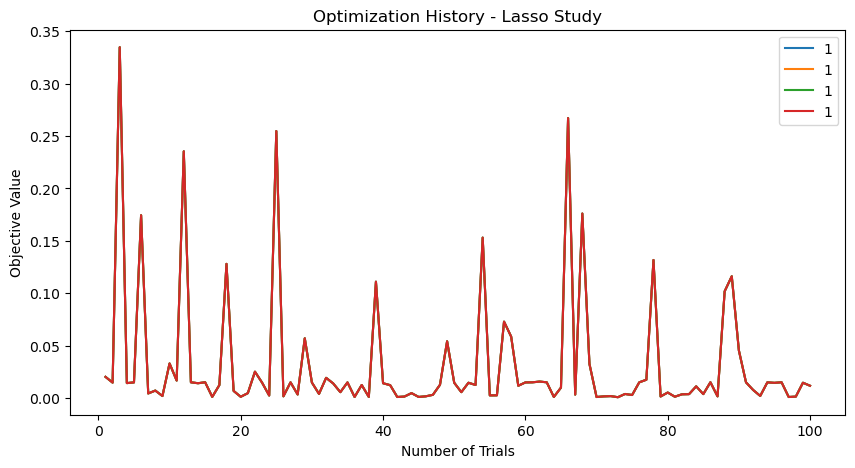

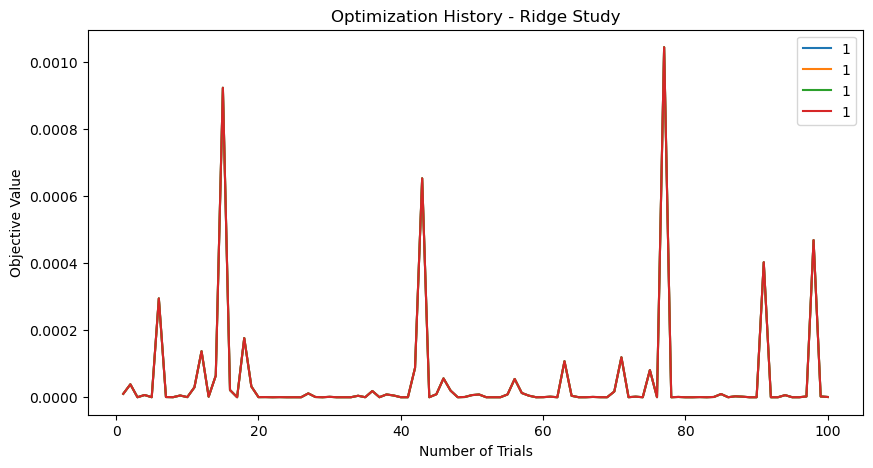

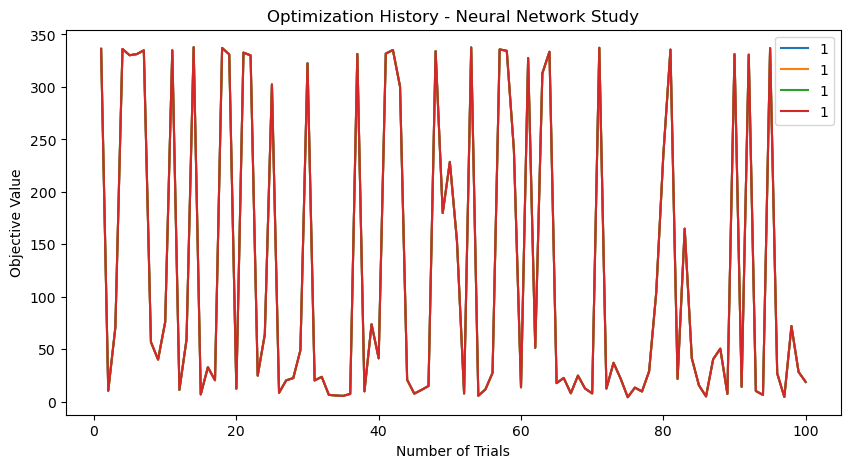

In [41]:
# Visualise optimization history for Lasso
plt.figure(figsize=(10, 5))
for objective in lasso_study.directions:
    trials = lasso_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Lasso Study')
plt.legend()
plt.show()

# Visualise optimization history for Ridge
plt.figure(figsize=(10, 5))
for objective in ridge_study.directions:
    trials = ridge_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Ridge Study')
plt.legend()
plt.show()

# Visualise optimization history for Neural Network
plt.figure(figsize=(10, 5))
for objective in nn_study.directions:
    trials = nn_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Neural Network Study')
plt.legend()
plt.show()

# Particle swarm optimization

In [45]:
import numpy as np
import pyswarms as ps
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import time

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
def lasso_objective(params):
    alpha = params[0][0]  # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

# Ridge Regression
def ridge_objective(params):
    alpha = params[0][0]   # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

def nn_objective(params):
    # Assuming params contains hyperparameters for the neural network
    hidden_layer_sizes = tuple(np.maximum(params[0].astype(int), 1))  # Replace zero or negative values with 1
    
    # Ensure that hidden_layer_sizes is a tuple of integers
    hidden_layer_sizes = tuple(int(size) for size in hidden_layer_sizes)
    
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)
    nn_model.fit(X_train, y_train)
    y_pred = nn_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae


# Set up PSO options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Lasso Optimization
start_time = time.time()
dimensions_lasso = (1)  # Only one parameter, alpha
center_lasso = [0.5]  # Set the center as a scalar
optimizer_lasso = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_lasso, options=options, center=center_lasso)
best_params_lasso = optimizer_lasso.optimize(lasso_objective, iters=100)
lasso_cost_history = optimizer_lasso.cost_history
lasso_training_time = time.time() - start_time

# Ridge Optimization
start_time = time.time()
dimensions_ridge = (1)  # Only one parameter, alpha
center_ridge = [0.5]  # Set the center as a scalar
optimizer_ridge = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_ridge, options=options, center=center_ridge)
best_params_ridge = optimizer_ridge.optimize(ridge_objective, iters=100)
ridge_cost_history = optimizer_ridge.cost_history
ridge_training_time = time.time() - start_time

# Neural Network Optimization
start_time = time.time()
dimensions_nn = (3)  # Example: Three hidden layers
center_nn = [0.5]  # Set the center as a scalar
optimizer_nn = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_nn, options=options, center=center_nn)
best_params_nn = optimizer_nn.optimize(nn_objective, iters=100)
nn_cost_history = optimizer_nn.cost_history
nn_training_time = time.time() - start_time

# Extract best hyperparameters
best_alpha_lasso = best_params_lasso[0]
best_alpha_ridge = best_params_ridge[0]

if hasattr(best_params_nn[0], '__iter__'):
    # Ensure that all elements are at least 1
    best_hidden_layer_sizes_nn = tuple(max(1, int(param)) for param in best_params_nn[0])
else:
    best_hidden_layer_sizes_nn = (max(1, int(best_params_nn[0])),)
    
# Train final models with best hyperparameters
start_time = time.time()
final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(X_train, y_train)
lasso_testing_time = time.time() - start_time

start_time = time.time()
final_ridge_model = Ridge(alpha=np.clip(best_alpha_ridge, 0.0, np.inf))
final_ridge_model.fit(X_train, y_train)
ridge_testing_time = time.time() - start_time

start_time = time.time()
final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, max_iter=1000)
final_nn_model.fit(X_train, y_train)
nn_testing_time = time.time() - start_time

# Evaluate final models on test set
y_pred_lasso = final_lasso_model.predict(X_test)
rmse_lasso, mae_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False), mean_absolute_error(y_test, y_pred_lasso)

y_pred_ridge = final_ridge_model.predict(X_test)
rmse_ridge, mae_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False), mean_absolute_error(y_test, y_pred_ridge)

y_pred_nn = final_nn_model.predict(X_test)
rmse_nn, mae_nn = mean_squared_error(y_test, y_pred_nn, squared=False), mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"Optimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {lasso_training_time:.4f} seconds")
print(f"Testing time for Lasso: {lasso_testing_time:.4f} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {ridge_training_time:.4f} seconds")
print(f"Testing time for Ridge: {ridge_testing_time:.4f} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {nn_training_time:.4f} seconds")
print(f"Testing time for Neural Network: {nn_testing_time:.4f} seconds")

2024-01-13 18:40:46,269 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=0.00131
2024-01-13 18:40:47,575 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0013067125977836464, best pos: [0.12246536]
2024-01-13 18:40:47,584 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████|100/100, best_cost=2.21e-13
2024-01-13 18:40:48,333 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2056468595357663e-13, best pos: [-0.49862221]
2024-01-13 18:40:48,342 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████|100/100, best_cost=0.793
2024-01-13 18:41:33,601 - pyswarms.single.global_best - INFO - Optimization finished | best cos

Optimal alpha for Lasso: 0.0013067125977836464
RMSE for Lasso on test set: 0.01935553159386454
MAE for Lasso on test set: 0.013901171495948113
Training time for Lasso: 1.3106 seconds
Testing time for Lasso: 0.0143 seconds

Optimal alpha for Ridge: 2.2056468595357663e-13
RMSE for Ridge on test set: 1.433006450860558e-13
MAE for Ridge on test set: 1.0966338948037446e-13
Training time for Ridge: 0.7574 seconds
Testing time for Ridge: 0.0023 seconds

Optimal hidden layer sizes for Neural Network: (1,)
RMSE for Neural Network on test set: 4.767683018036996
MAE for Neural Network on test set: 3.6620235823450646
Training time for Neural Network: 45.2677 seconds
Testing time for Neural Network: 0.3554 seconds


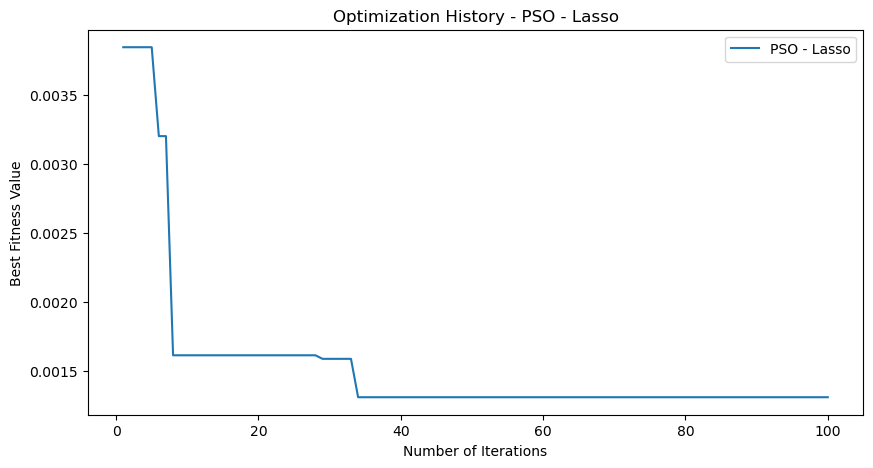

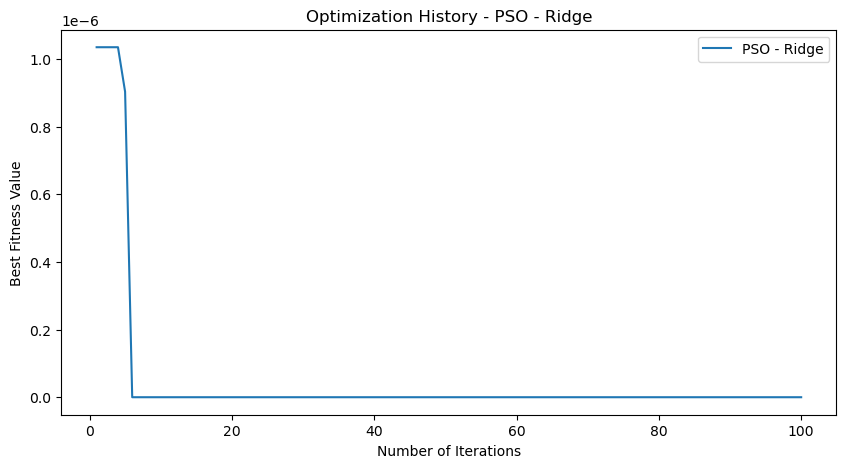

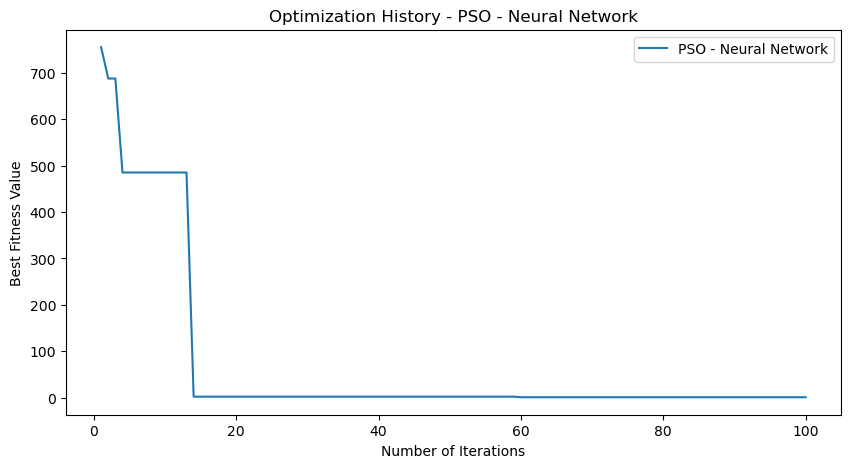

In [46]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Visualize optimization history for PSO - Lasso
plt.figure(figsize=(10, 5))
history_lasso = np.minimum.accumulate(optimizer_lasso.cost_history)
plt.plot(np.arange(len(history_lasso)) + 1, history_lasso, label='PSO - Lasso')

plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - PSO - Lasso')
plt.legend()
plt.show()

# Visualize optimization history for PSO - Ridge
plt.figure(figsize=(10, 5))
history_ridge = np.minimum.accumulate(optimizer_ridge.cost_history)
plt.plot(np.arange(len(history_ridge)) + 1, history_ridge, label='PSO - Ridge')

plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - PSO - Ridge')
plt.legend()
plt.show()

# Visualise optimization history for PSO - Neural Network
plt.figure(figsize=(10, 5))
history_nn = np.minimum.accumulate(optimizer_nn.cost_history)
plt.plot(np.arange(len(history_nn)) + 1, history_nn, label='PSO - Neural Network')

plt.xlabel('Number of Iterations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - PSO - Neural Network')
plt.legend()
plt.show()

# Differential Evolution Optimization

In [47]:
import time
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso
def lasso_objective(alpha_array):
    alpha = np.clip(alpha_array[0], 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    start_time = time.time()
    lasso_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = lasso_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse

# Ridge
def ridge_objective(alpha):
    alpha = np.clip(alpha, 0.0, np.inf)
    ridge_model = Ridge(alpha=alpha)
    start_time = time.time()
    ridge_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = ridge_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse

# Neural Network
def nn_objective(params):
    hidden_layer_sizes = tuple(np.maximum(params.astype(int), 1))
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=100)
    start_time = time.time()
    nn_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = nn_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse

# Differential Evolution Optimization
result_lasso = differential_evolution(lasso_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_ridge = differential_evolution(ridge_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_nn = differential_evolution(nn_objective, bounds=[(10, 100), (10, 100), (1e-5, 1e-2)], maxiter=50)

# Extract best hyperparameters
best_alpha_lasso = np.clip(result_lasso.x[0], 0.0, np.inf)
best_alpha_ridge = np.clip(result_ridge.x[0], 0.0, np.inf)
best_hidden_layer_sizes_nn = tuple(np.maximum(result_nn.x[:2].astype(int), 1))
best_learning_rate_nn = result_nn.x[2]

# Train final models with best hyperparameters
final_lasso_model = Lasso(alpha=best_alpha_lasso)
start_time = time.time()
final_lasso_model.fit(X_train, y_train)
end_time = time.time()
training_time_lasso = end_time - start_time

final_ridge_model = Ridge(alpha=best_alpha_ridge)
start_time = time.time()
final_ridge_model.fit(X_train, y_train)
end_time = time.time()
training_time_ridge = end_time - start_time

final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, learning_rate_init=best_learning_rate_nn, max_iter=1000)
start_time = time.time()
final_nn_model.fit(X_train, y_train)
end_time = time.time()
training_time_nn = end_time - start_time

# Evaluate final models on test set
start_time = time.time()
y_pred_lasso = final_lasso_model.predict(X_test)
end_time = time.time()
testing_time_lasso = end_time - start_time
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

start_time = time.time()
y_pred_ridge = final_ridge_model.predict(X_test)
end_time = time.time()
testing_time_ridge = end_time - start_time
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

start_time = time.time()
y_pred_nn = final_nn_model.predict(X_test)
end_time = time.time()
testing_time_nn = end_time - start_time
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"\nOptimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {training_time_lasso} seconds")
print(f"Testing time for Lasso: {testing_time_lasso} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {training_time_ridge} seconds")
print(f"Testing time for Ridge: {testing_time_ridge} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"Optimal learning rate for Neural Network: {best_learning_rate_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {training_time_nn} seconds")
print(f"Testing time for Neural Network: {testing_time_nn} seconds")


Optimal alpha for Lasso: 0.15615122906511664
RMSE for Lasso on test set: 0.0007350567391016144
MAE for Lasso on test set: 0.0005870131595663874
Training time for Lasso: 0.006987094879150391 seconds
Testing time for Lasso: 0.0005118846893310547 seconds

Optimal alpha for Ridge: 1.0002361037209084e-05
RMSE for Ridge on test set: 1.6604789665741884e-10
MAE for Ridge on test set: 1.2306816898899342e-10
Training time for Ridge: 0.00411224365234375 seconds
Testing time for Ridge: 0.00033593177795410156 seconds

Optimal hidden layer sizes for Neural Network: (69, 72)
Optimal learning rate for Neural Network: 0.005036243742112683
RMSE for Neural Network on test set: 0.2415588943759006
MAE for Neural Network on test set: 0.1930514574032469
Training time for Neural Network: 0.8863217830657959 seconds
Testing time for Neural Network: 0.0004570484161376953 seconds


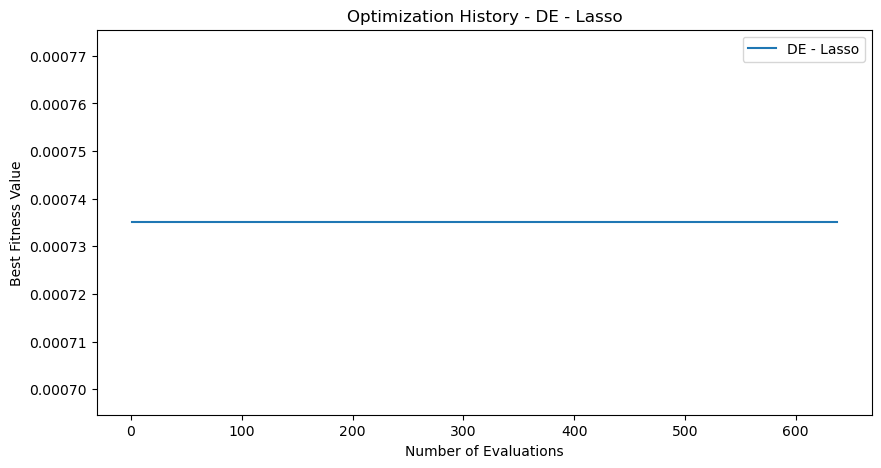

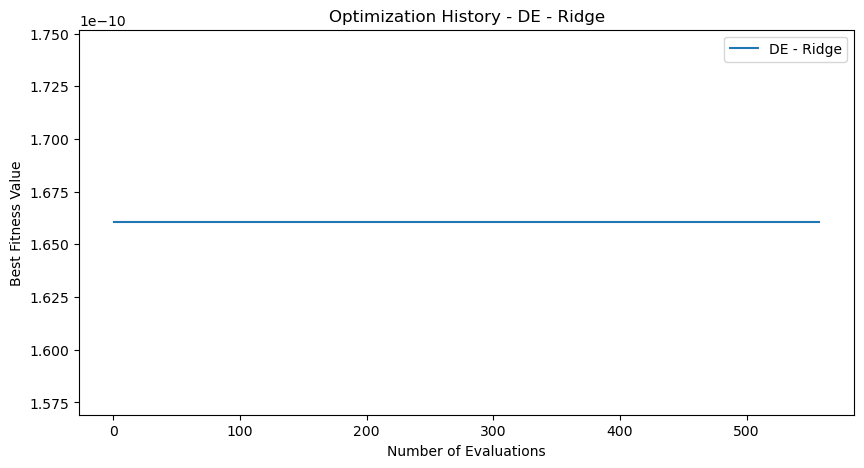

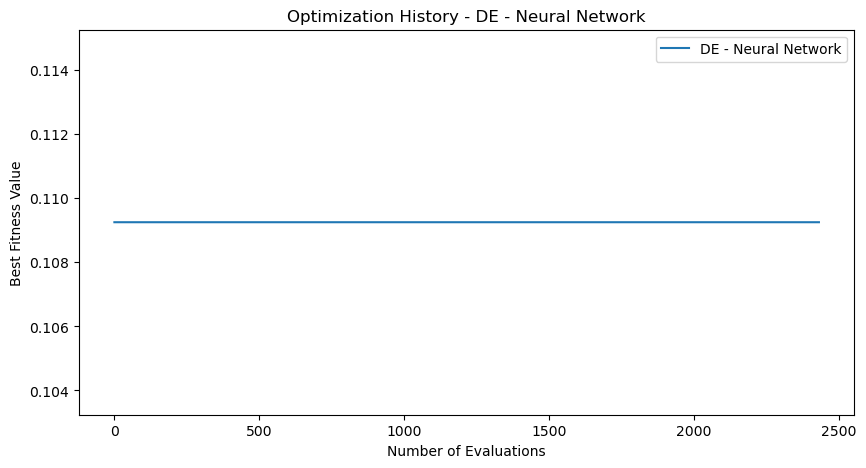

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Visualise optimization history for DE - Lasso
plt.figure(figsize=(10, 5))
history_lasso = [result_lasso.fun] * result_lasso.nfev
plt.plot(np.arange(len(history_lasso)) + 1, history_lasso, label='DE - Lasso')

plt.xlabel('Number of Evaluations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - DE - Lasso')
plt.legend()
plt.show()

# Visualise optimization history for DE - Ridge
plt.figure(figsize=(10, 5))
history_ridge = [result_ridge.fun] * result_ridge.nfev
plt.plot(np.arange(len(history_ridge)) + 1, history_ridge, label='DE - Ridge')

plt.xlabel('Number of Evaluations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - DE - Ridge')
plt.legend()
plt.show()

# Visualise optimization history for DE - Neural Network
plt.figure(figsize=(10, 5))
history_nn = [result_nn.fun] * result_nn.nfev
plt.plot(np.arange(len(history_nn)) + 1, history_nn, label='DE - Neural Network')

plt.xlabel('Number of Evaluations')
plt.ylabel('Best Fitness Value')
plt.title('Optimization History - DE - Neural Network')
plt.legend()
plt.show()